# Submission Information:

### Team Member 1:
* UNI:  
* Name:

### Team Member 2 [optional]:
* UNI:  
* Name:

# Step0 - Import Libraries, Load Data [0 points]

This is the basic step where you can load the data and create train and test sets for internal validation as per your convinience.

In [1]:
#write code below, you can make multiple cells
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
% matplotlib inline
plt.rcParams["figure.dpi"] = 100

data_dir = os.path.join('data', 'data.csv')
df_data = pd.read_csv(os.path.join('data', 'data.csv'), na_values={'education': "unknown"})

In [2]:
df_data.head()

,age,job,marital_status,education,credit_default,housing,loan,contact,month,day_of_week,...,campaign,prev_days,prev_contacts,prev_outcomes,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,subscribed
0,41.0,blue-collar,married,basic.9y,no,yes,no,cellular,apr,mon,...,2.0,999,0,nonexistent,-1.695118,92.698705,-46.727552,1.345160,5097.0,no
1,46.0,entrepreneur,married,NaN,no,no,no,cellular,may,wed,...,2.0,999,0,nonexistent,-1.767159,92.914878,-46.313088,1.314499,5100.0,no
2,56.0,unemployed,married,basic.9y,no,yes,yes,cellular,nov,fri,...,1.0,999,0,nonexistent,-0.100365,93.423076,-41.904559,4.003471,5193.0,no
3,89.0,retired,divorced,basic.4y,no,yes,no,cellular,may,wed,...,4.0,999,0,nonexistent,-1.771314,93.672814,-46.045500,1.261668,5100.0,no
4,34.0,entrepreneur,married,university.degree,unknown,yes,no,cellular,jul,thu,...,8.0,999,0,nonexistent,1.458103,94.296285,-42.455877,5.152077,5233.0,no


# Step1 - Exploration and Preparation [10 points]

In this step, we expect you to look into the data and try to understand it before modeling. This understanding may lead to some basic data preparation steps which are common across the two model sets required.

In [3]:
df_data.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 21 columns):
age               32950 non-null float64
job               32950 non-null object
marital_status    32950 non-null object
education         31556 non-null object
credit_default    32950 non-null object
housing           32950 non-null object
loan              32950 non-null object
contact           32950 non-null object
month             32950 non-null object
day_of_week       32950 non-null object
duration          32950 non-null float64
campaign          32950 non-null float64
prev_days         32950 non-null int64
prev_contacts     32950 non-null int64
prev_outcomes     32950 non-null object
emp_var_rate      32950 non-null float64
cons_price_idx    32950 non-null float64
cons_conf_idx     32950 non-null float64
euribor3m         32950 non-null float64
nr_employed       32950 non-null float64
subscribed        32950 non-null object
dtypes: float64(8), int64(2), object(11)
memo

In [13]:
df_data = df_data.dropna()

df_target = df_data.subscribed.replace({'no':0,'yes':1})

df_data_ = df_data.drop(["subscribed", "duration"], axis=1)

In [14]:
df_data_.shape

(31556, 19)

In [15]:
categorical = df_data_.columns[df_data_.dtypes=="object"]
continuous = df_data_.columns[df_data_.dtypes!="object"]

categorical_no_edu = categorical[categorical != 'education']

In [16]:
# education is ordinal data.. 
ordinal_encode = {"education": {"illiterate": 0,"basic.4y": 1,"basic.6y": 2, "basic.9y": 3, 
                                "high.school": 4, "professional.course": 5, "university.degree": 6}}

In [17]:
df_data_.replace(ordinal_encode, inplace=True)

In [18]:
df_encoded = pd.get_dummies(df_data_, columns=categorical_no_edu)
df_encoded.head()

,age,education,campaign,prev_days,prev_contacts,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,prev_outcomes_failure,prev_outcomes_nonexistent,prev_outcomes_success
0,41.0,3,2.0,999,0,-1.695118,92.698705,-46.727552,1.345160,5097.0,...,0,0,0,1,0,0,0,0,1,0
2,56.0,3,1.0,999,0,-0.100365,93.423076,-41.904559,4.003471,5193.0,...,0,0,1,0,0,0,0,0,1,0
3,89.0,1,4.0,999,0,-1.771314,93.672814,-46.045500,1.261668,5100.0,...,0,0,0,0,0,0,1,0,1,0
4,34.0,6,8.0,999,0,1.458103,94.296285,-42.455877,5.152077,5233.0,...,0,0,0,0,1,0,0,0,1,0
5,33.0,2,3.0,999,0,1.498926,97.710487,-42.994167,5.017193,5231.0,...,0,0,0,1,0,0,0,0,1,0


In [19]:
X_train, X_test, y_train, y_test = train_test_split(df_encoded, df_target, random_state=0, stratify=df_target)

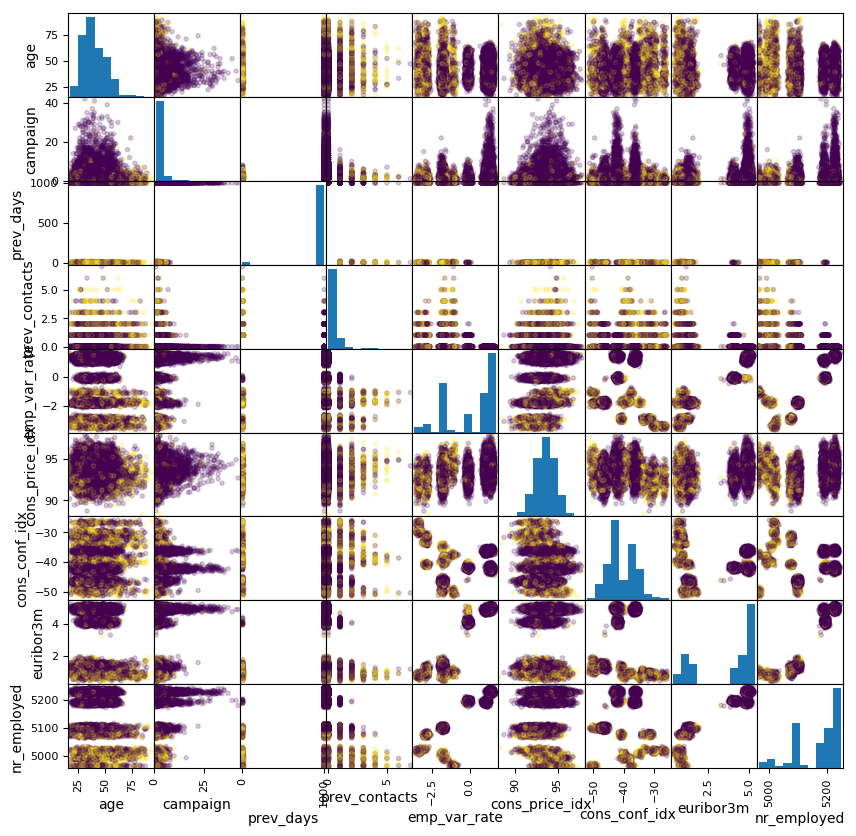

In [27]:
# pd.scatter_matrix(X_train[continuous],c=y_train,alpha=.2, figsize=(10, 10));

# Step2 - ModelSet1 [35 points]

In this step, we expect you to perform the following steps relevant to the models you choose for set1:

* feature engineering
* validation
* feature selection
* final model selection

You may select up to 5 models in this step for the purpose of final ensemble. Any classification algorithm covered in class apart from tree-based models can be tested here.

In [28]:
# write code below, you can make multiple cells
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegressionCV, ElasticNetCV
from sklearn.model_selection import cross_val_score

In [29]:
#Predict with continuous variables
pipe_cont_Logistic = make_pipeline(StandardScaler(), LogisticRegressionCV())
print (cross_val_score(pipe_cont_Logistic, X_train, y_train, cv=5, scoring="roc_auc"))

pipe_cont_Elastic = make_pipeline(StandardScaler(), ElasticNetCV())
print (cross_val_score(pipe_cont_Elastic, X_train, y_train, cv=5, scoring="roc_auc"))

[ 0.75433959  0.75465261  0.7680048   0.768313    0.75577348]
[ 0.75140989  0.75156017  0.76480761  0.76665884  0.75573089]


In [35]:
print(pipe_cont_Logistic.named_steps['logisticregressioncv'].coef_)

AttributeError: 'LogisticRegressionCV' object has no attribute 'coef_'

In [ ]:
pipe_lr = make_pipeline(StandardScaler(), LogisticRegression())

param_grid_dt = {'max_depth': range(1, 10)}
grid_dt = GridSearchCV(pipe_lr, param_grid_dt, cv=10)
grid_dt.fit(X_train, y_train)

# Step3 - ModelSet2 [35 points]

In this step, we expect you to perform the following steps relevant to the models you choose for set2:

* feature engineering
* validation
* feature selection
* final model selection

You may select up to 5 models in this step for the purpose of final ensemble. We encourage you to try decition tree, random forest and gradient boosted tree methods here and pick the one which you think works best.

In [ ]:
#write code below, you can make multiple cells

### Decision Tree

In [36]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier

In [84]:
pipe_dt = make_pipeline(DecisionTreeClassifier())

param_grid_dt = {'decisiontreeclassifier__max_depth': range(1, 10)}
grid_dt = GridSearchCV(pipe_dt, param_grid_dt, cv=10, scoring='roc_auc')
grid_dt.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=Pipeline(steps=[('decisiontreeclassifier', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'decisiontreeclassifier__max_depth': range(1, 10)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [85]:
grid_dt.best_params_

{'decisiontreeclassifier__max_depth': 6}

In [91]:
grid_dt.score(X_test, y_test)

0.771188717761773

In [98]:
feature_dt_dict = {}
feature_dt_dict['name'] = X_train.columns.values
feature_dt_dict['coef'] = grid_dt.best_estimator_.named_steps['decisiontreeclassifier'].feature_importances_
feature_dt_pd = pd.DataFrame(feature_dt_dict) 
feature_dt_pd[feature_dt_pd.coef > 0].sort_values('coef', ascending=False)

,coef,name
9,0.619532,nr_employed
54,0.098647,prev_outcomes_success
7,0.082651,cons_conf_idx
5,0.032107,emp_var_rate
3,0.029211,prev_days
45,0.023961,month_oct
35,0.016056,contact_cellular
52,0.015314,prev_outcomes_failure
49,0.013456,day_of_week_thu
6,0.010855,cons_price_idx


In [102]:
feature_dt_pd[feature_dt_pd.coef == 0]

,coef,name
10,0.0,job_admin.
11,0.0,job_blue-collar
12,0.0,job_entrepreneur
13,0.0,job_housemaid
14,0.0,job_management
17,0.0,job_services
18,0.0,job_student
19,0.0,job_technician
20,0.0,job_unemployed
21,0.0,job_unknown


### Random Forest

In [87]:
from sklearn.ensemble import RandomForestClassifier

In [88]:
pipe_rf = make_pipeline(RandomForestClassifier(n_estimators=100))

param_grid_rf = {'randomforestclassifier__max_features': range(1, 10)}
grid_rf = GridSearchCV(pipe_rf, param_grid_rf, cv=10, scoring='roc_auc')
grid_rf.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=Pipeline(steps=[('randomforestclassifier', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'randomforestclassifier__max_features': range(1, 10)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [89]:
grid_rf.best_params_

{'randomforestclassifier__max_features': 6}

In [92]:
grid_rf.score(X_test, y_test)

0.77322416222603652

In [105]:
feature_rf_dict = {}
feature_rf_dict['name'] = X_train.columns.values
feature_rf_dict['coef'] = grid_rf.best_estimator_.named_steps['randomforestclassifier'].feature_importances_
feature_rf_pd = pd.DataFrame(feature_rf_dict) 
feature_rf_pd[feature_rf_pd.coef > 0].sort_values('coef', ascending=False)

,coef,name
9,1.180833e-01,nr_employed
8,1.125090e-01,euribor3m
7,1.036593e-01,cons_conf_idx
5,9.976893e-02,emp_var_rate
6,8.372248e-02,cons_price_idx
0,7.377596e-02,age
3,3.609022e-02,prev_days
2,3.514447e-02,campaign
1,3.237153e-02,education
54,2.118642e-02,prev_outcomes_success


In [107]:
feature_rf_pd[feature_rf_pd.coef == 0]

,coef,name


### Gradient Boosting

In [109]:
from sklearn.ensemble import GradientBoostingClassifier

In [110]:
pipe_gb = make_pipeline(GradientBoostingClassifier())

param_grid_gb = {'gradientboostingclassifier__max_features': range(1, 10)}
grid_gb = GridSearchCV(pipe_gb, param_grid_gb, cv=10, scoring='roc_auc')
grid_gb.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=Pipeline(steps=[('gradientboostingclassifier', GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'gradientboostingclassifier__max_features': range(1, 10)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [ ]:
grid_gb.best_params_

In [ ]:
grid_gb.score(X_test, y_test)

### Resampling Imbalanced Data (quick and dirty ensemble)
we can compare the final score on before and after resampling data

In [111]:
from sklearn.base import clone
from sklearn.model_selection import cross_val_score
from imblearn.pipeline import make_pipeline as make_imb_pipeline
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import VotingClassifier

def make_resampled_ensemble(estimator, n_estimators=100):
    estimators = []
    for i in range(n_estimators):
        est = clone(estimator)
        if hasattr(est, "random_state"):
            est.random_state = i
        pipe = make_imb_pipeline(RandomUnderSampler(random_state=i, replacement=True), est)
        estimators.append(("est_i".format(i), pipe))
    return VotingClassifier(estimators, voting="soft")

In [112]:
from sklearn.tree import DecisionTreeClassifier

tree_test = DecisionTreeClassifier(max_features='auto')

scores = cross_val_score(tree_test, X_train, y_train, cv=10, scoring='roc_auc')
print('before resample {}'.format(np.mean(scores)))

before resample 0.6156714606509983


In [113]:
resampled_tree_test = make_resampled_ensemble(DecisionTreeClassifier(max_features='auto'))

scores = cross_val_score(resampled_tree_test, X_train, y_train, cv=10, scoring='roc_auc')
print('after resample {}'.format(np.mean(scores)))

after resample 0.7824421369373511


# Step4 - Ensemble [20 points + 10 Bonus points]

In this step, we expect you to use the models created before and create new predictions. You should definitely try poor man's stacking but we encourage you to think of different ensemble techniques as well. We will judge your creativity and improvement in model performance using ensemble models and you can potentially earn 10 bonus points here.

In [ ]:
from sklearn.ensemble import VotingClassifier

voting = VotingClassifier([
                           ('tree', DecisionTreeClassifier(max_depth=grid_dt.best_params_['max_depth'])),
                           ('random_forest', RandomForestClassifier(n_estimators=grid_rf.best_params_['n_estimators'])),
                           ('logreg', LogisticRegression(C=grid_lr.best_params_['C']))
                            ],
                         voting='soft')
voting.fit(X_train, y_train)

In [ ]:
#write code below, you can make multiple cells
assert True